# Import Library

In [287]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from sklearn.preprocessing import OneHotEncoder

# Membaca dataset

In [288]:
dataset = pd.read_csv('data.csv')
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,data_worst,Unnamed: 33
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,NaN


# Dataset terlalu besar dan pemrosesan lama, jadi dipangkas menjadi 500 baris secara acak

In [289]:
n = 500
if len(dataset) > n:
    random_indices = np.random.choice(len(dataset), n, replace=False)
    dataset = dataset.iloc[random_indices]

dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,data_worst,Unnamed: 33
168,8712766,M,17.47,24.68,116.10,984.6,0.10490,0.16030,0.21590,0.104300,...,155.30,1660.0,0.1376,0.38300,0.48900,0.17210,0.2160,0.09300,NaN,NaN
123,865432,B,14.50,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.057780,...,102.80,745.5,0.1313,0.17880,0.25600,0.12210,0.2889,0.08006,NaN,NaN
535,919555,M,20.55,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.132200,...,160.20,1809.0,0.1268,0.31350,0.44330,0.21480,0.3077,0.07569,NaN,NaN
148,86973702,B,14.44,15.18,93.97,640.1,0.09970,0.10210,0.08487,0.055320,...,108.60,766.9,0.1316,0.27350,0.31030,0.15990,0.2691,0.07683,NaN,NaN
547,922840,B,10.26,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.024380,...,71.08,357.4,0.1461,0.22460,0.17830,0.08333,0.2691,0.09479,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,91504,M,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.067590,...,106.00,788.0,0.1794,0.39660,0.33810,0.15210,0.3651,0.11830,NaN,NaN
96,86211,B,12.18,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.029410,...,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,NaN,NaN
144,869254,B,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,...,77.79,441.2,0.1076,0.12230,0.09755,0.03413,0.2300,0.06769,NaN,NaN
138,868826,M,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.086240,...,121.40,971.4,0.1411,0.21640,0.33550,0.16670,0.3414,0.07147,NaN,NaN


# Memisahkan fitur dan target

In [290]:
X = dataset.drop('id', axis=1) 
y = dataset['id']

# Menggunakan label encoding untuk mengubah variabel target "id" menjadi 1 dan 0

In [291]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset menjadi train dan test

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memisahkan kolom-kolom numerik dan kategorikal

In [293]:
numeric_cols = [col for col in X_train.columns if X_train[col].dtype != 'object']
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Menggunakan OneHotEncoder dengan handle_unknown='id' pada kolom kategorikal

In [294]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Mengkodekan kolom data kategorikal pada X_train dan X_test

In [295]:
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Mengonversi seluruh dataset (fitur dan target) ke float32

In [296]:
X_train[numeric_cols] = X_train[numeric_cols].astype('float32')
X_test[numeric_cols] = X_test[numeric_cols].astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Membuat Sequential model

In [297]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 


In [298]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 32)                96        
                                                                 
 dense_53 (Dense)            (None, 8)                 264       
                                                                 
 dense_54 (Dense)            (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


 # Mengompilasi model

In [299]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [300]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.84 and logs.get('val_accuracy') > 0.84):
            self.model.stop_training = True

# Melatih model

In [301]:
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(400, 2)
(100, 2)


In [302]:
kolbek = MyCallback()
history = model.fit(
        X_train_encoded, 
        y_train, 
        epochs=10, 
        batch_size=64, 
        validation_data=(X_test_encoded, y_test),
        callbacks=[kolbek]
    )

Epoch 1/10


7/7 [==============================] - 1s 24ms/step - loss: -38.5664 - accuracy: 0.0025 - val_loss: -53.5681 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 0s 5ms/step - loss: -64.2558 - accuracy: 0.0025 - val_loss: -76.1163 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: -87.2638 - accuracy: 0.0025 - val_loss: -96.5132 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 0s 6ms/step - loss: -108.5300 - accuracy: 0.0025 - val_loss: -117.5792 - val_accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: -130.4742 - accuracy: 0.0025 - val_loss: -139.4673 - val_accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 0s 7ms/step - loss: -153.5903 - accuracy: 0.0025 - val_loss: -162.4399 - val_accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: -178.4480 - accuracy: 0.0025 - val_loss: -189.0979 - val_a

# Evaluasi model

In [303]:
score = model.evaluate(X_test_encoded, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/4 [======>.......................] - ETA: 0s - loss: -307.0266 - accuracy: 0.0000e+00

4/4 [==============================] - 0s 2ms/step - loss: -293.2744 - accuracy: 0.0000e+00
Test loss: -293.2744445800781
Test accuracy: 0.0


# Menampilkan grafik model loss dan model accuracy, baik pada training maupun validation

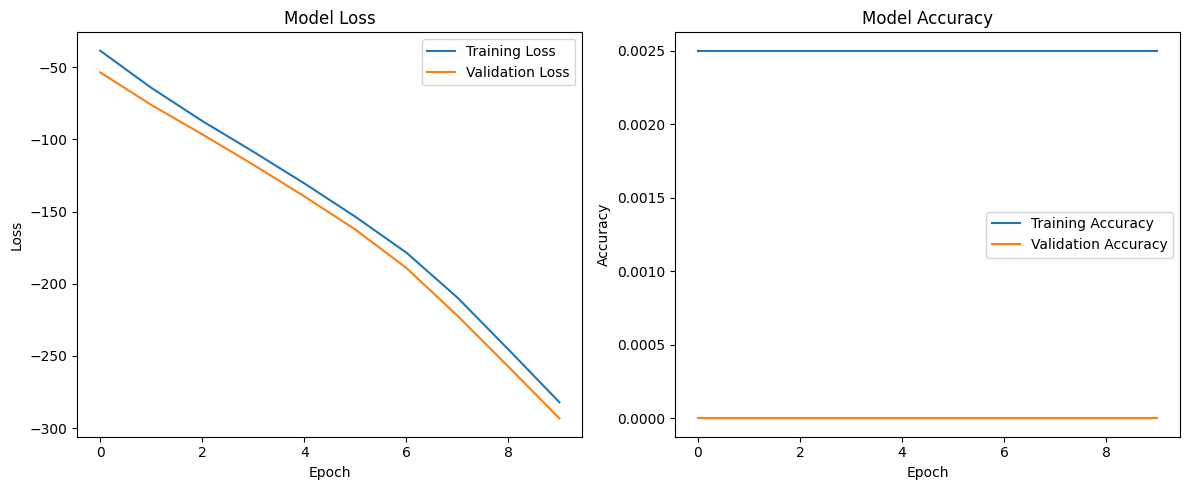

In [304]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.tight_layout()
plt.show()